In [ ]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle




In [ ]:


# Load the y_train.pkl file
with open('/content/drive/My Drive/bda2023/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

# Load the y_test.pkl file
with open('/content/drive/My Drive/bda2023/y_test.pkl', 'rb') as d:
    y_test = pickle.load(d)


In [ ]:


# load npz file
with np.load('/content/drive/My Drive/bda2023/vector_file_train_0419.npz') as data:
    X_train_val = data['X_train']
    feature_names = data['feature_names']

# create pandas DataFrame from X_train
X_train = pd.DataFrame(X_train_val, columns=feature_names)


# load npz file
with np.load('/content/drive/My Drive/bda2023/vector_file_test_0419.npz') as data_t:
    X_test_val = data_t['X_test']
    feature_names = data_t['feature_names']

# create pandas DataFrame from X_train
X_test = pd.DataFrame(X_test_val, columns=feature_names)
X_test

,一口氣,一模一樣,一監,一萬,三洋實業,上半場,上市股,上揚,上架,上機,...,高爾夫球,鮑爾仍,鮮食,鴻塑,黃南宏,黃文清,黃美賢,黎方國,點位,點收點
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115662,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# SVM Model

              precision    recall  f1-score   support

           漲       0.45      0.19      0.26       465
           跌       0.48      0.76      0.59       454

    accuracy                           0.47       919
   macro avg       0.46      0.48      0.43       919
weighted avg       0.46      0.47      0.42       919



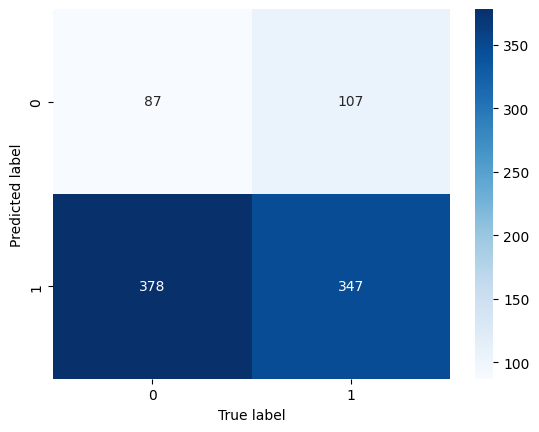

In [ ]:
# train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# predict on test set
y_pred = svm_model.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


# KNN Model

              precision    recall  f1-score   support

           漲       0.52      0.52      0.52       465
           跌       0.51      0.50      0.50       454

    accuracy                           0.51       919
   macro avg       0.51      0.51      0.51       919
weighted avg       0.51      0.51      0.51       919



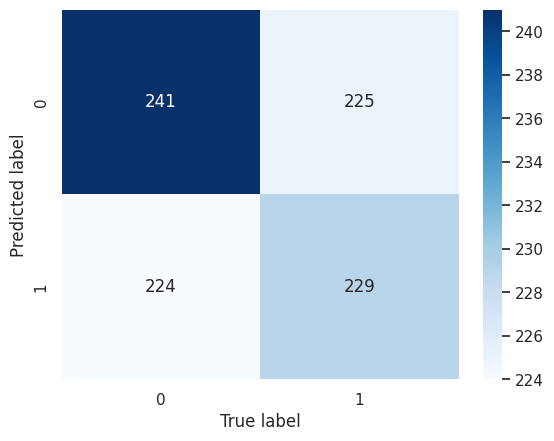

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define KNN model
knn_model = KNeighborsClassifier()

# define parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [5, 10, 15],
              'weights': ['uniform', 'distance']}

# perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get best hyperparameters and train KNN model with them
best_params = grid_search.best_params_
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)

# predict on test set
y_pred = knn_model.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


# Logistic Regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWar

              precision    recall  f1-score   support

           漲       0.49      0.37      0.42       465
           跌       0.48      0.60      0.53       454

    accuracy                           0.49       919
   macro avg       0.49      0.49      0.48       919
weighted avg       0.49      0.49      0.48       919



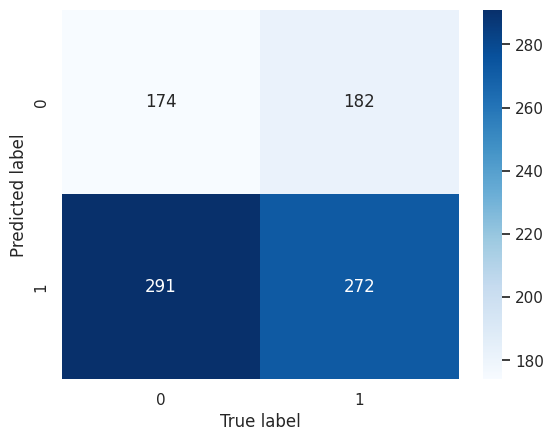

In [ ]:
from sklearn.linear_model import LogisticRegression

# define logistic regression model
lr_model = LogisticRegression()

# define parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2', 'elasticnet', 'none']}

# perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get best hyperparameters and train logistic regression model with them
best_params = grid_search.best_params_
lr_model = LogisticRegression(**best_params)
lr_model.fit(X_train, y_train)

# predict on test set
y_pred = lr_model.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


# Random Forest

              precision    recall  f1-score   support

           漲       0.55      0.40      0.46       465
           跌       0.52      0.66      0.58       454

    accuracy                           0.53       919
   macro avg       0.53      0.53      0.52       919
weighted avg       0.53      0.53      0.52       919



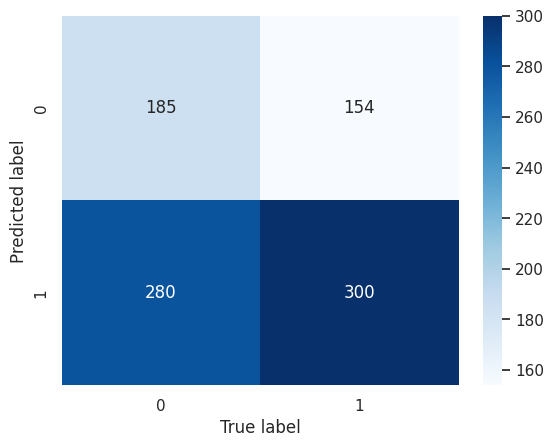

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define Random Forest model
rf_model = RandomForestClassifier()

# train Random Forest model
rf_model.fit(X_train, y_train)

# predict on test set
y_pred = rf_model.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


# Decision Tree Classifier

              precision    recall  f1-score   support

           漲       0.54      0.45      0.49       465
           跌       0.52      0.60      0.56       454

    accuracy                           0.53       919
   macro avg       0.53      0.53      0.52       919
weighted avg       0.53      0.53      0.52       919



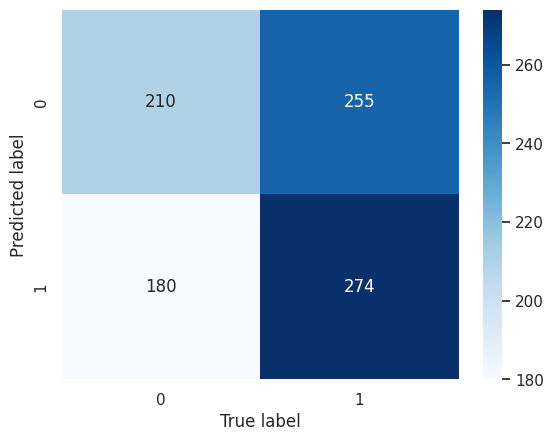

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define decision tree model
tree_model = DecisionTreeClassifier()

# train decision tree model
tree_model.fit(X_train, y_train)

# predict on test set
y_pred = tree_model.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


# Naive Bayes Classifier

              precision    recall  f1-score   support

           漲       0.51      0.52      0.52       465
           跌       0.50      0.48      0.49       454

    accuracy                           0.50       919
   macro avg       0.50      0.50      0.50       919
weighted avg       0.50      0.50      0.50       919



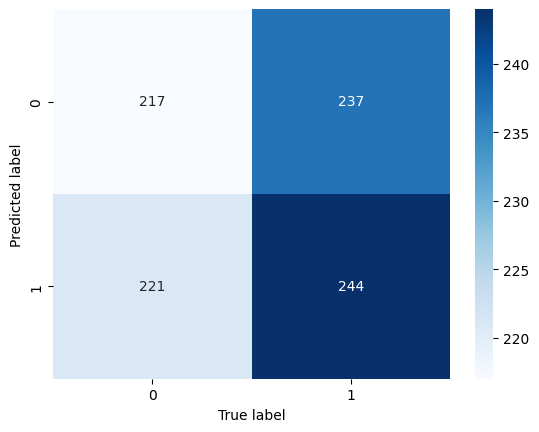

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define Bernoulli Naive Bayes model
nb = BernoulliNB()

# train the model
nb.fit(X_train, y_train)

# predict on test set
y_pred = nb.predict(X_test)

# evaluate performance
print(classification_report(y_test, y_pred))

# get unique labels in y_test and reverse their order
labels = unique_labels(y_test)
labels = np.flip(labels)

# generate confusion matrix and plot it with swapped labels and values
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()
